# Import Necessary Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.datasets import cifar10
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import SGD

# Load the 'CIFAR-10' Dataset & Examine it

In [2]:
# Load the CIFAR-10 dataset & split it into training and validation datasets
(x_train, y_train), (x_val, y_val) = cifar10.load_data()

# Some print statements to examine the dataset we have
print("Number of samples in our training data: " + str(len(x_train)))
print("Number of labels in our training data: " + str(len(y_train)))
print("Number of samples in our validation data: " + str(len(x_val)))
print("Number of labels in our validation data: " + str(len(y_val)))
print()
print("Dimensions of x_train: " + str(x_train.shape))
print("Dimensions of x_val: " + str(x_val.shape))

Number of samples in our training data: 50000
Number of labels in our training data: 50000
Number of samples in our validation data: 10000
Number of labels in our validation data: 10000

Dimensions of x_train: (50000, 32, 32, 3)
Dimensions of x_val: (10000, 32, 32, 3)


# Preprocessing Our Dataset

## Preprocessing our image datasets i.e x_train & x_val

In [3]:
# Change our image data type to float32 data type
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_val /= 255

## Preprocessing our label datasets i.e y_train & y_val

In [4]:
# Since we are dealing with categorical data, we need to 'One-Hot' encode our labels
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)

# Build a Model

## Create the Model

In [5]:
# Initalize the model using Sequential class from Keras
model = Sequential()
# Add first convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                 input_shape=(32, 32, 3), padding="same"))
# Add a pooling layer which will downsample our data
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add 2nd convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 activation='relu', padding="same"))
# Add a pooling layer which will downsample our data
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add 3rd convolutional layer
model.add(Conv2D(filters=128, kernel_size=(
    3, 3), activation='relu', padding="same"))
# Add a pooling layer which will downsample our data
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add 4th convolutional layer
model.add(Conv2D(filters=256, kernel_size=(
    3, 3), activation='relu', padding="same"))
# Add a pooling layer which will downsample our data
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a flatten layer which will aid in flattening the input
model.add(Flatten())
# Add a dense/FC layer
model.add(Dense(units=256, activation='relu'))
# Add a droput layer which will aid in regularization
model.add(Dropout(0.5))
# Add a dense/FC layer
model.add(Dense(units=512, activation='relu'))
# Add a droput layer which will aid in regularization
model.add(Dropout(0.5))
# Add a dense/FC layer
model.add(Dense(units=10, activation='softmax'))
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.05),
              metrics=['accuracy'])
# Print a summary of our model
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)         2

## Define Callbacks

In [6]:
# Define a callback for saving only the best model during the training
checkpoint = ModelCheckpoint(filepath="./Trained Models/cifar10_image_classifier.h5",
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True,
                             verbose=1)

# Define a callback to stop training when validation accuracy has stopped increasing
earlystop = EarlyStopping(monitor='val_accuracy',
                          mode='max',
                          patience=3,
                          restore_best_weights=True,
                          verbose=1)

# Put our callbacks into a list
callbacks = [earlystop, checkpoint]

# Train the Model

In [7]:
# Train our model and store the training results in a variable
model_train_result = model.fit(x=x_train,
                               y=y_train,
                               batch_size=32,
                               epochs=100,
                               callbacks=callbacks,
                               validation_data=(x_val, y_val))

Epoch 1/100
1563/1563 [==============================] - ETA: 0s - loss: 2.0012 - accuracy: 0.2511
Epoch 00001: val_accuracy improved from -inf to 0.38100, saving model to ./Trained Models\cifar10_image_classifier.h5
1563/1563 [==============================] - 11s 7ms/step - loss: 2.0012 - accuracy: 0.2511 - val_loss: 1.6959 - val_accuracy: 0.3810
Epoch 2/100
1561/1563 [============================>.] - ETA: 0s - loss: 1.5506 - accuracy: 0.4295
Epoch 00002: val_accuracy improved from 0.38100 to 0.46800, saving model to ./Trained Models\cifar10_image_classifier.h5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5504 - accuracy: 0.4295 - val_loss: 1.4584 - val_accuracy: 0.4680
Epoch 3/100
1559/1563 [============================>.] - ETA: 0s - loss: 1.3304 - accuracy: 0.5175
Epoch 00003: val_accuracy improved from 0.46800 to 0.55950, saving model to ./Trained Models\cifar10_image_classifier.h5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3304 - 

# Evaluate Model's Performance

## Loss & Accuracy Charts

### Loss Chart

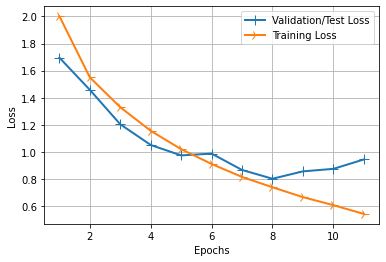

In [8]:
history_dict = model_train_result.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

### Accuracy chart

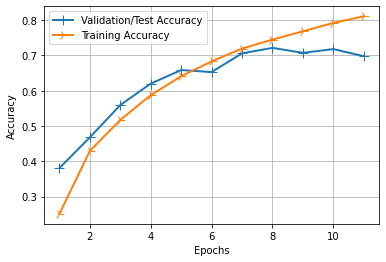

In [9]:
history_dict = model_train_result.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

## Classification Report for Validation Dataset

In [10]:
# Undo the one-hot encoding for y_val
y_val = np.argmax(y_val, axis=1)

# Get model's predictions for each image in validation dataset
val_pred = model.predict(x_val, batch_size=32)

# Undo the one-hot encoding for val_pred
val_pred = np.argmax(val_pred, axis=1)

# Get class names
class_names = np.array(['airplane', 'automobile', 'bird',
                        'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

# Get the classification report generated for validation dataset
print(classification_report(y_true=y_val,
                            y_pred=val_pred, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.78      0.72      0.75      1000
  automobile       0.85      0.81      0.83      1000
        bird       0.69      0.58      0.63      1000
         cat       0.53      0.55      0.54      1000
        deer       0.66      0.72      0.69      1000
         dog       0.57      0.69      0.62      1000
        frog       0.79      0.79      0.79      1000
       horse       0.87      0.68      0.76      1000
        ship       0.77      0.87      0.82      1000
       truck       0.79      0.81      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



## Confusion Matrix for Validation Dataset

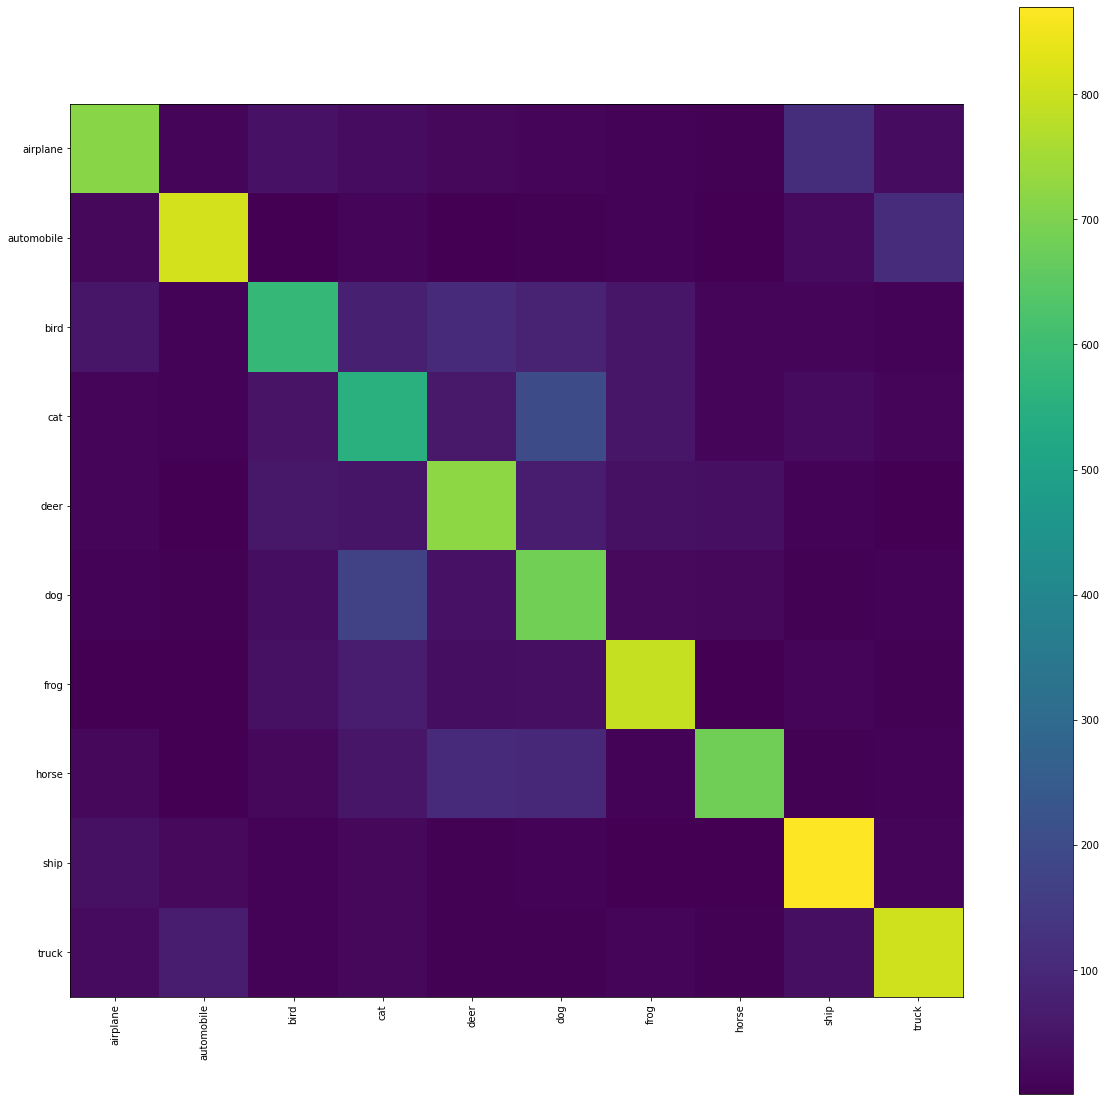

In [11]:
# Generate the confusion matrix for validation dataset
cnf_matrix = confusion_matrix(y_true=y_val, y_pred=val_pred)

# Display the confusion matrix
plt.figure(figsize=(20, 20))
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(class_names))
_ = plt.xticks(tick_marks, class_names, rotation=90)
_ = plt.yticks(tick_marks, class_names)
plt.show()